In [31]:
#AMIT RAMCHANDRA MALI
import numpy as np# Importing required modules
import pandas as pd

In [32]:
df = pd.read_csv('Dataset-SA.csv')#Importing dataset-Flipkart customer review dataset

In [4]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [7]:
df.shape# got 6 columns each with 205052 entries

(205052, 6)

In [9]:
df.info() # To check whether there is any missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [10]:
#Preprocessing- 1. Dropping columns of no use like product_name 2. Merging related columns-Feature extraction
df = df.drop(columns=['product_name', 'product_price', 'Rate'])# Dropping unrelated columns
df['text'] = df['Review'].fillna('') + ' ' + df['Summary'].fillna('')# merging Review and Summary into 1 Column
df = df[['text', 'Sentiment']]

In [11]:
df.head()

,text,Sentiment
0,super! great cooler excellent air flow and for...,positive
1,awesome best budget 2 fit cooler nice cooling,positive
2,fair the quality is good but the power of air ...,positive
3,useless product very bad product its a only a fan,negative
4,fair ok ok product,neutral


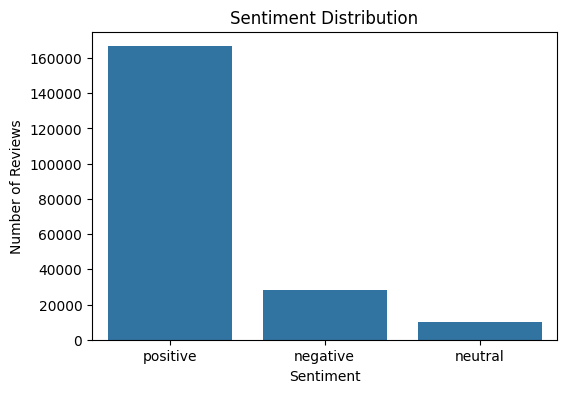

In [13]:
#useful data visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [16]:
#Extracting input and output columns
X = df['text']
y = df['Sentiment']

In [21]:
from sklearn.model_selection import train_test_split # using it so that we can later on during evaluation of model 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)#90% for training and 10% for testing

In [24]:
X_train

75417                                          poor quality
203607                    nice product mindblowing purchase
138648                            awesome very good product
10929                                        excellent good
6560                         worthless nice picture quality
                                ...                        
86935            wonderful best product best brand must buy
178060                       perfect product! loved my baby
174958       brilliant thanks flipkart super good iron cool
64150                                          awesome good
116226    decent product it is good but the chromcast an...
Name: text, Length: 184546, dtype: object

In [22]:
#Labelling output sentiment column
from sklearn.preprocessing import LabelEncoder # labelling Y column which is my output column which is in characters but scikit-learn work numbers

le = LabelEncoder() 

# Fit on training labels and transform both train & test
y_train_encoded = le.fit_transform(y_train) # mapped different type of flower to number
y_test_encoded = le.transform(y_test)

# Check the mapping
print("Class mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name} → {i}")

Class mapping:
negative → 0
neutral → 1
positive → 2


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer# Vectorizing text using TF-IDF
# TF-IDF (Term Frequency-Inverse Document Frequency) converts text into numerical features

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_vec, y_train_encoded)# training model named Logistic Regression


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:

y_pred = model.predict(X_test_vec)#Predicting output using model attribute 'predict'


In [28]:
y_pred #displaying predicted output 

array([2, 2, 2, ..., 0, 2, 2], shape=(20506,))

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_encoded, y_pred)# Calculating Accuracy score of model


In [30]:
accuracy# Got accuracy about 93.04%

0.9304593777430996

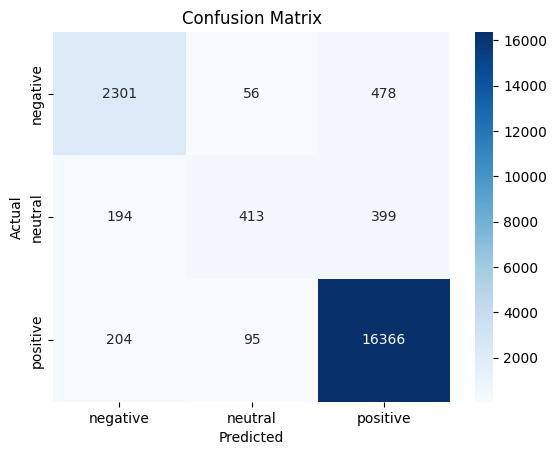

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.81      0.83      2835
     neutral       0.73      0.41      0.53      1006
    positive       0.95      0.98      0.97     16665

    accuracy                           0.93     20506
   macro avg       0.84      0.73      0.77     20506
weighted avg       0.93      0.93      0.93     20506



In [35]:
from sklearn.metrics import classification_report, confusion_matrix# Displaying model evaluation
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))
